# Part 2.1: Prediction Using Grid Search

In [1]:
# Run the common codes to import modules, get data and pre-defined loss functions
%run Part0.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               1061 non-null   object  
 1   selling_price      1061 non-null   int64   
 2   year               1061 non-null   int64   
 3   seller_type        1061 non-null   category
 4   owner              1061 non-null   int32   
 5   km_driven          1061 non-null   int64   
 6   ex_showroom_price  626 non-null    float64 
dtypes: category(1), float64(1), int32(1), int64(3), object(1)
memory usage: 46.9+ KB
None
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  I

In [2]:
# the dataframe
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1,350,NaN
1,Honda Dio,45000,2017,Individual,1,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2,21000,NaN


In [3]:
# the loss function
x = [34, 37, 44, 47, 48, 48, 46, 43, 32, 27, 26, 24]
y = [37, 40, 46, 44, 46, 50, 45, 44, 34, 30, 22, 23]

loss(x, y)

2.4324199198877374

In [4]:
df.selling_price.describe()

count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: selling_price, dtype: float64

## Define helper functions
Before we start the grid search, it will be convinient if we first define the following functions:
1. The loss function to calculate the rmse
2. The grid search function to search the fitting parameters which gives the minimum of rmse

In [5]:
# define grid search function
## obs: observations (pandas series)
## var_x: variable (regressor) used for prediction (pandas series)
## rng_b0: range of initial b0 grid (list of upper and lower bounds)
## rng_b1: range of initial b1 grid (list of upper and lower bounds)
## n_grid: number of grids
def grid_search(obs, var_x, rng_b0, rng_b1, n_grid):
    # set up grid axes and get the step sizes
    lst_b0, b0_step = np.linspace(rng_b0[0], rng_b0[1], n_grid + 1, retstep = True)
    lst_b1, b1_step = np.linspace(rng_b1[0], rng_b1[1], n_grid + 1, retstep = True)
    
    # remove duplicated stops
    lst_b0 = list(set(lst_b0))
    lst_b1 = list(set(lst_b1))
    
    # generate the search grid by expanding axes
    grid = [(b0, b1) for b0 in lst_b0 for b1 in lst_b1]
    
    # calculate rmse for every point in the search grid
    lst_rmse = [loss(obs, b0 + b1 * np.array(var_x)) for b0, b1 in grid]
    
    # find optimal b0 and b1
    idx = lst_rmse.index(np.min(lst_rmse))
    b0, b1 = grid[idx] 
    print(f"index: {idx}, b0 = {b0}, b1 = {b1}")
    print(f"step size: b0 = {b0_step}, b1 = {b1_step}")
    
    return b0, b1, b0_step, b1_step

## Task 1: Just $y$
The model we will first try is: $\hat{y}_i = \beta_0 + \beta_1 x_i$ with $\beta_1 = 0$.

In this case, we only use $\beta_0$ to predict the selling price. Therefore, we can choose the initial range of the search grid for $\beta_0$ to be the range of the selling prices. The search grid for $\beta_1$ is zero. We will do 1000 grids in each of our search.

- Initial range for $\beta_0$: The minimum and maximum of the selling price
- Initial range for $\beta_1$: The initial range is 0 (we are not using it in this model)
- Number of grids: 1000

### The 1st grid search

In [6]:
# set up initial parameters
## rng_b0 = [lower bound, upper bound] of initial b0
## rng_b1 = [lower bound, upper bound] of initial b1
rng_b0 = [df.selling_price.min(), df.selling_price.max()]
rng_b1 = [0, 0]
n_grid = 1000

# perform grid search
b0, b1, b0_step, b1_step = grid_search(df.selling_price, df.km_driven, rng_b0, rng_b1, n_grid)

index: 985, b0 = 59360.0, b1 = 0.0
step size: b0 = 755.0, b1 = 0.0


We found that when $\beta_0$ is 59360.0, we have the minimal rmse.

The step size for $\beta_0$ is 755.0 so we can narrow down the search grid and do another grid search.

### The 2nd grid search

In [7]:
# set up initial parameters
rng_b0 = [b0 - b0_step, b0 + b0_step]
rng_b1 = [b1 - b1_step, b1 + b1_step]
n_grid = 1000

# perform grid search
b0, b1, b0_step, b1_step = grid_search(df.selling_price, df.km_driven, rng_b0, rng_b1, n_grid)

index: 162, b0 = 59637.84, b1 = 0.0
step size: b0 = 1.51, b1 = 0.0


We found that when $\beta_0$ is 59637.84, we have the minimal rmse.

The step size for $\beta_0$ is 1.51 so we can narrow down the search grid and do another grid search.

### The 3rd grid search

In [8]:
# set up initial parameters
rng_b0 = [b0 - b0_step, b0 + b0_step]
rng_b1 = [b1 - b1_step, b1 + b1_step]
n_grid = 1000

# perform grid search
b0, b1, b0_step, b1_step = grid_search(df.selling_price, df.km_driven, rng_b0, rng_b1, n_grid)

index: 689, b0 = 59638.15106, b1 = 0.0
step size: b0 = 0.0030200000000040745, b1 = 0.0


Now the step size is small and we have the precision to the 1st decimal point:
- $\beta_0 = 59638.15106$ with step size $0.0030200000000040745$

The value of $\beta_0$ is close to the mean of the selling price $59638.151744$ as expected.

## Task 2: Using $y$ and another numeric variable $x$
Now we will fit the model $\hat{y}_i = \beta_0 + \beta_1 x_i$.

To determine the inital ranges of the search grids for $\beta_0$ and $\beta_1$, recall the scatter plot:

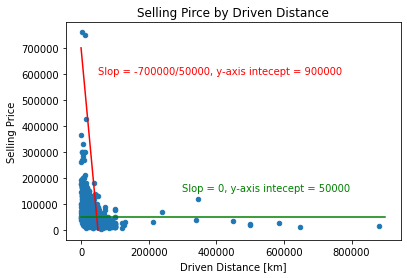

In [9]:
# graphic summery - scatter plot of selling price by driven distance
df.plot.scatter(x="km_driven", y="selling_price")
plt.xlabel("Driven Distance [km]")
plt.ylabel("Selling Price")
plt.title("Selling Pirce by Driven Distance")

# add two estimated fitting lines for low- and high-mileage data points
plt.plot([0, 50000], [700000, 0], c = "red")
plt.plot([0, 900000], [50000, 50000], c = "green")

# annotate the estimated slopes and y-axis intercepts
plt.annotate("Slop = -700000/50000, y-axis intecept = 900000", xy =(50000, 600000), c = "red")
plt.annotate("Slop = 0, y-axis intecept = 50000", xy =(300000, 150000), c = "green")

plt.show()

With low milelages, we can draw a line (red) with a negative slope (≈-700000/50000) and a large positive y-axis intercept (≈1000000). Similarly, with high milelages (right), we can draw a horizontal line (green) with a zero slope (≈0) and a small postive y-axis intercept (≈50000). A best fitting line has a slop and y-axis intercept between these two lines' slopes and y-axis intecepts. 

Therefore, we can use these two lines to estimate the lower and upper bounds of the slope $\beta_1$ and the y-axis intercept $\beta_0$, and use them as the inital ranges of our search grids.

- Initial range for $\beta_0$: 50000 ~ 1000000
- Initial range for $\beta_1$: -700000/50000 ~ 0
- Number of grids: 100

### The 1st grid search

In [10]:
# set up initial parameters and precision
## rng_b0 = [lower bound, upper bound] of initial b0
## rng_b1 = [lower bound, upper bound] of initial b1
rng_b0 = [50000, 1000000]
rng_b1 = [-700000/50000, 0]
n_grid = 100

# perform grid search
b0, b1, b0_step, b1_step = grid_search(df.selling_price, df.km_driven, rng_b0, rng_b1, n_grid)

index: 7883, b0 = 69000.0, b1 = -0.27999999999999936
step size: b0 = 9500.0, b1 = 0.14


We found that when $\beta_0$ is 69000.0 and $\beta_1$ is -0.27999999999999936, we have the minimal rmse.

The step sizes for both $\beta_0$ and $\beta_1$ are quite big. Therefore, we can narrow down the search grid and do another grid search.

### The 2nd grid search

In [11]:
# set up initial parameters
rng_b0 = [b0 - b0_step, b0 + b0_step]
rng_b1 = [b1 - b1_step, b1 + b1_step]
n_grid = 100

# perform grid search
b0, b1, b0_step, b1_step = grid_search(df.selling_price, df.km_driven, rng_b0, rng_b1, n_grid)

index: 1677, b0 = 67670.0, b1 = -0.23239999999999936
step size: b0 = 190.0, b1 = 0.0028000000000000004


We found that when $\beta_0$ is 67670.0 and $\beta_1$ is -0.23239999999999936, we have the minimal rmse.

The step size for $\beta_1$ is small but for $\beta_0$, it is quite big. Therefore, we can narrow down the search grid and do another grid search.

### The 3rd grid search

In [12]:
# set up initial parameters
rng_b0 = [b0 - b0_step, b0 + b0_step]
rng_b1 = [b1 - b1_step, b1 + b1_step]
n_grid = 100

# perform grid search
b0, b1, b0_step, b1_step = grid_search(df.selling_price, df.km_driven, rng_b0, rng_b1, n_grid)

index: 904, b0 = 67616.8, b1 = -0.23223199999999936
step size: b0 = 3.8, b1 = 5.599999999999994e-05


We found that when $\beta_0$ is 67616.8 and $\beta_1$ is -0.23223199999999936, we have the minimal rmse.

The step size for $\beta_0$ is 3.8. To get precision to the decimal point, we can narrow down the search grid and do another grid search.

### The 4th grid search

In [13]:
# set up initial parameters
rng_b0 = [b0 - b0_step, b0 + b0_step]
rng_b1 = [b1 - b1_step, b1 + b1_step]
n_grid = 100

# perform grid search
b0, b1, b0_step, b1_step = grid_search(df.selling_price, df.km_driven, rng_b0, rng_b1, n_grid)

index: 7680, b0 = 67618.092, b1 = -0.23224543999999936
step size: b0 = 0.0760000000000582, b1 = 1.1200000000000098e-06


At last, both the step sizes are small and we have the precision to the 1st decimal point:
- $\beta_0 = 67618.092$ with step size $0.0760000000000582$
- $\beta_1 = -0.23224543999999936$ with step size $1.1200000000000098e-06$

And these agree well with the simple linear regression:

In [14]:
# fit a simple linear regression model for comparison
slope, intercept, *_ = stats.linregress(df.km_driven, df.selling_price)
print(f"intercept (b0) = {intercept}, slope (b1) = {slope}")

intercept (b0) = 67618.07212024048, slope (b1) = -0.2322456088674644


## Task 3: Predict Selling Prices

In [15]:
# Use the model to predict the selling prices for the specified driven distances
[b0 + b1*x for x in [10000, 25000, 35000]]

[65295.63760000001, 61811.95600000002, 59489.501600000025]

- The predicted selling price for 10000 km driven distance is 65295.63760000001.
- The predicted selling price for 25000 km driven distance is 61811.95600000002.
- The predicted selling price for 35000 km driven distance is 59489.501600000025.